<a href="https://colab.research.google.com/github/phionex2/Handwritten-Digit-classification/blob/main/handwritten_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()#upload mnist dataset

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train#data in pixel value

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_test.shape#number of data

(10000, 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

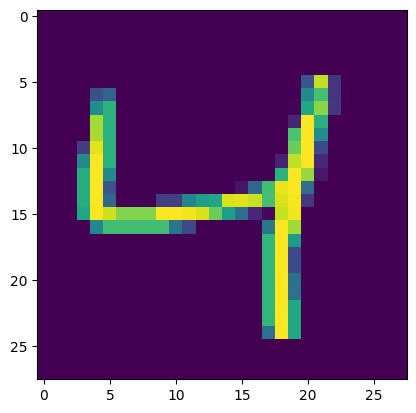

In [11]:
#convert pixel value into the image
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [12]:
#specified range
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
#Artificial model
model = Sequential()
#Since we have 28*28 pix and every pix presents in 2d and we have to pass the input in 1d form (784) for that we have to flatten the pix(i.e side by side every pix)
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(15,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])#labels doesn't need to pass through the one hot encoder

In [38]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2900 - accuracy: 0.9174 - val_loss: 0.1549 - val_accuracy: 0.9542
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1271 - accuracy: 0.9623 - val_loss: 0.1236 - val_accuracy: 0.9613
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0882 - accuracy: 0.9732 - val_loss: 0.0980 - val_accuracy: 0.9702
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0668 - accuracy: 0.9795 - val_loss: 0.0902 - val_accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0852 - val_accuracy: 0.9740
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0948 - val_accuracy: 0.9717
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0311 - accuracy: 0.9907 - val_loss: 0.0845 - val_acc

In [39]:
#predictions
y_prob = model.predict(X_test)#probability of chacarter to be 1,2,3,4....

313/313 [==============================] - 1s 2ms/step


In [40]:
y_pred = y_prob.argmax(axis=1)

In [41]:
#Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9775

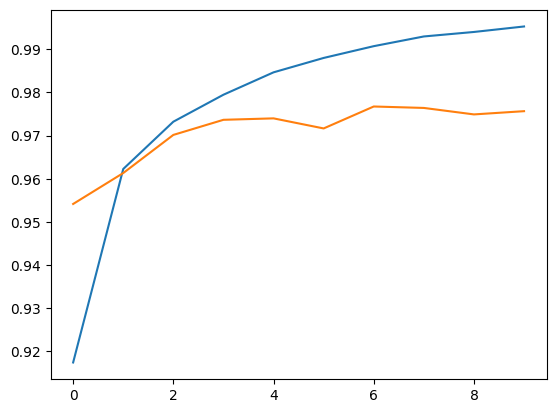

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

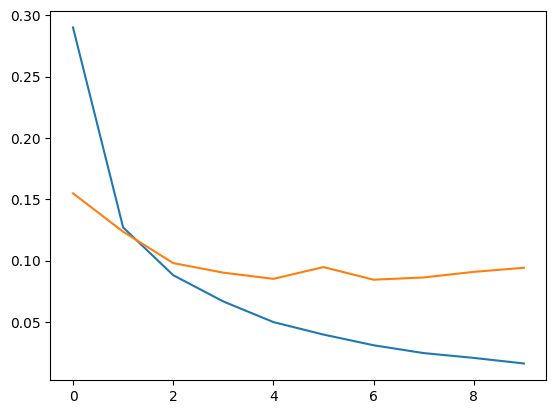

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

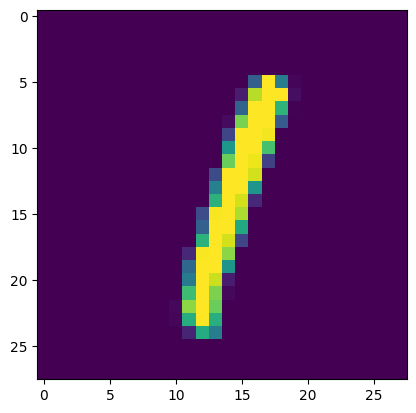

In [44]:
#NOW PREDICTION
plt.imshow(X_test[5])

In [46]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 75ms/step


array([1])